## Table and plot of the ROIs + matrix plot

In [1]:
# import necessary modules
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from nilearn.image import index_img, iter_img
from nilearn.plotting import find_xyz_cut_coords
from nilearn import plotting, image

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


### Load mask and labels and get coordinates

In [2]:
# load the image and labels 
all_regions_img = image.load_img('/media/maria/Elements/Bipolife_BIDS/A1/code/maria_thesis/dmn_limbic_2903.nii.gz')
all_region_labels = np.load('/media/maria/Elements/Bipolife_BIDS/A1/code/maria_thesis/dmn_limbic_labels_2903.npy', allow_pickle= True)

### creating the region list for appendix

In [3]:
import pandas as pd
from nilearn.plotting import find_xyz_cut_coords

df = pd.DataFrame(columns = ['region','x','y','z'])

# get the coords for every region and them to the list
for i in range(len(all_region_labels)):
    cur_img = index_img(all_regions_img, i)
    coords = find_xyz_cut_coords(cur_img)
    region_list = [all_region_labels[i],coords[0],coords[1],coords[2]]
    df.loc[len(df)] = region_list

In [4]:
df = df.sort_values('region')
df

,region,x,y,z
26,Amygdala LH,-25.316398,-10.532319,-21.012628
27,Amygdala RH,25.235306,-10.041223,-21.571700
24,Angular gyrus inferior LH,-49.097090,-62.003504,27.397524
25,Angular gyrus inferior RH,55.824341,-57.749097,25.137653
16,Angular gyrus posterior LH,-41.829143,-78.333701,38.188974
17,Angular gyrus posterior RH,46.983923,-67.979825,33.334574
9,Anterior cingulate cortex,0.903634,38.441191,19.722125
3,Dorsomedial prefrontal cortex antero-superior,-0.414903,56.181791,15.559854
7,Dorsomedial prefrontal cortex anteromedial,-0.382749,46.047697,34.386195
6,Hippocampal fissure,19.511418,-24.474622,-10.508179


In [5]:
df.to_csv('/media/sf_shared_VB/region_coords_ordered.tsv', sep='\t', index=False)  

### Plot all ROIs in brain space

In [6]:
# shortened the labels that are too long for the plot and created a new label list
new_labels = ['vmPFC', 'Middle temporal gyrus RH',
       'Posterior cingulate cortex',
       'dmPFC antero-superior',
       'Middle temporal gyrus LH', 'Posterior cingulate cortex inferior',
       'Hippocampal fissure',
       'dmPFC anteromedial',
       'Parieto-occipital sulcus anterior', 'Anterior cingulate cortex',
       'Retrosplenial cortex', 'Superior frontal sulcus anterior LH',
       'vmPFC anterior', 'Thalamus',
       'Superior frontal sulcus LH', 'Superior frontal sulcus RH',
       'Angular gyrus posterior LH', 'Angular gyrus posterior RH',
       'Parahippocampal gyrus LH', 'Parahippocampal gyrus RH',
       'Pars triangularis LH', 'Pars triangularis RH',
       'Superior frontal sulcus anterior LH2',
       'Superior frontal sulcus anterior RH', 'Angular gyrus inferior LH',
       'Angular gyrus inferior RH', 'Amygdala LH', 'Amygdala RH',
       'Hippocampus posterior LH', 'Hippocampus posterior RH',
       'Hippocampus anterior LH', 'Hippocampus anterior RH']

#### change order to alphabetically regarding names of regions 

In [7]:
# create a table containing the index and region name in the original order 
orig_order = pd.DataFrame(columns = ["index","region"])
orig_order["index"]=range(0,32)
orig_order["region"] = new_labels
#orig_order

In [8]:
# create a list with the alphabetical order of regions and labels
# create a table containing the index and region names sorted alphabetically
order_df = orig_order.sort_values(by="region", key = lambda  col: col.str.lower())
#order_df
# get from the table the right ordered list of indices
order = list(order_df["index"])
#order

/home/maria/miniconda3/lib/python3.8/site-packages/nilearn/plotting/img_plotting.py:348: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()


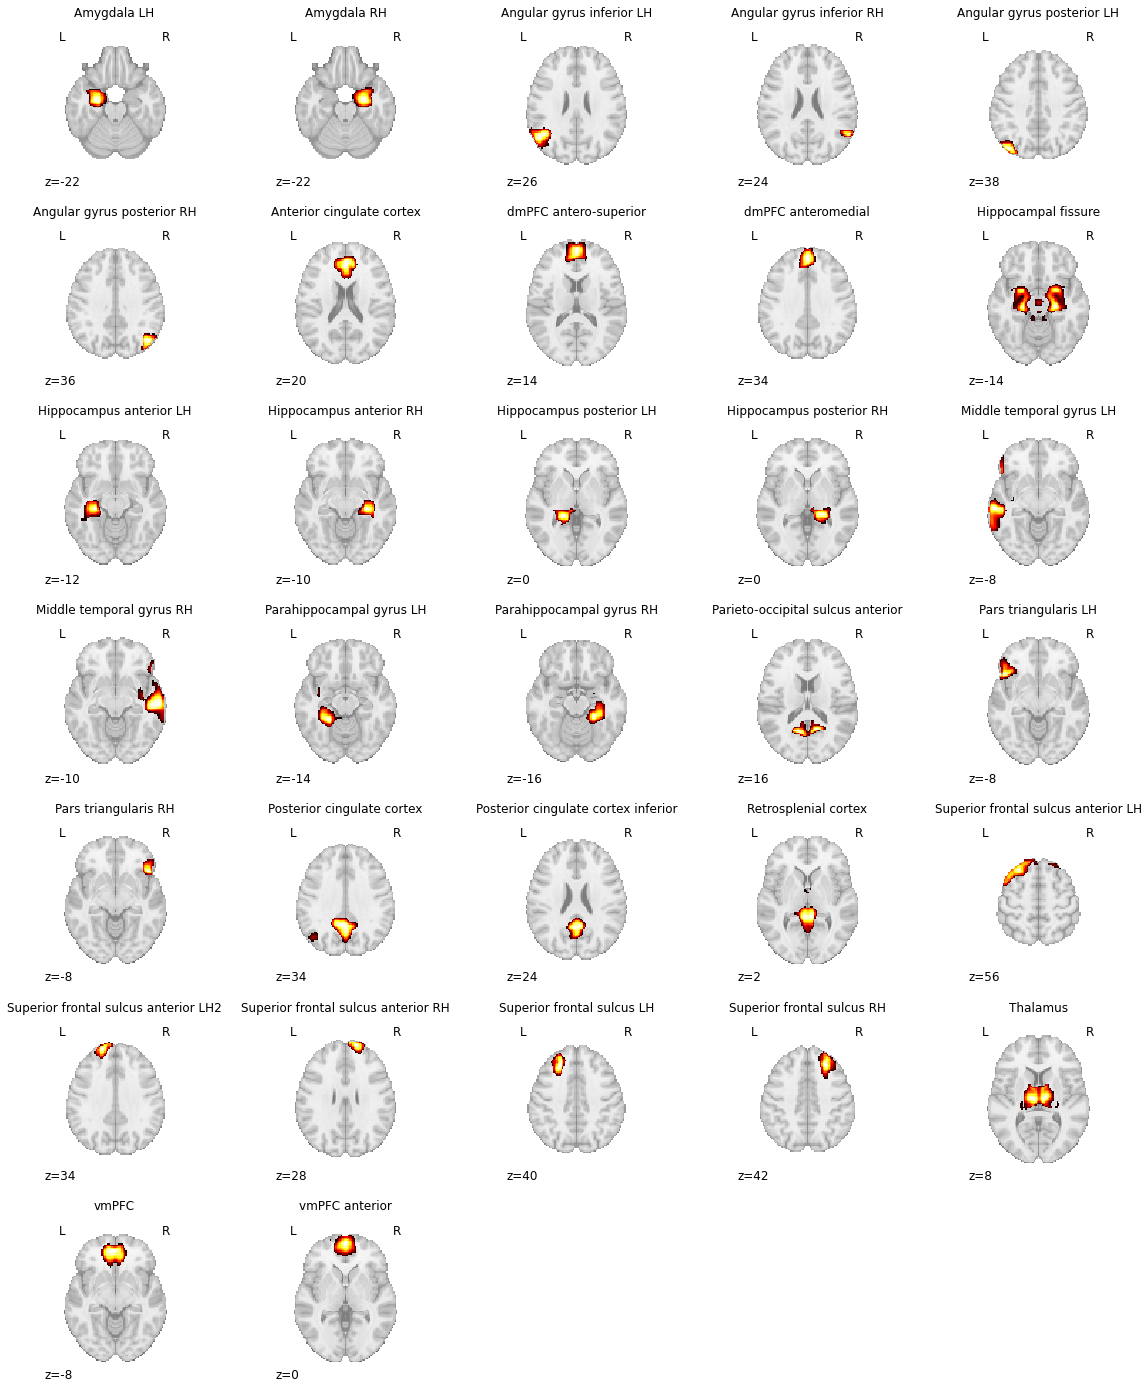

In [9]:
# plot all the ROIs in one figure
plt.rcParams.update({'font.size': 10})

# Grid of subplots
fh = plt.figure(figsize=(20,25))
for ind, plot_ind in zip(order, range(0,32)):
    ax = fh.add_subplot(7, 5, plot_ind + 1, title= new_labels[ind])
    cur_img = index_img(all_regions_img, ind)
    plotting.plot_stat_map(cur_img, axes=ax, display_mode='z' , cut_coords = 1, colorbar=False)
plt.savefig('/media/sf_shared_VB/dmn_limbic_regions_0806.png')
plt.show()

### Plot partial correlation matrix of one subject

In [10]:
matrix = pd.read_csv('/media/maria/Elements/Bipolife_BIDS/A1/derivatives/connectivity_matrices/subs/kind-partial_correlation/sub-MR05/2903/sub-MR05_atlas-difumo_kind-partial_correlation_connectivity_matrix_2903.csv', header=None, skiprows = 1)
sub_correlation_matrix = matrix.drop(0, axis=1)            

In [11]:
# shortcuts for every region for better visualisation
labels =['vmPFC','mTG_RH','PCC','ant-sup dmPFC',
         'mTG_LH','inf PCC','HF', 'ant-med dmPFC',
         'ant POS','ACC', 'RSC','ant SFS_LH','ant vmPFC',
         'Thala', 'SFS_LH','SFS_RH','pos AG_LH',
         'pos AG_RH','PHG_LH','PHG_RH','PT_LH',
         'PT_RH','ant SFS_LH2','ant SFS_RH',
         'inf AG_LH', 'inf AG_RH', 'Amy_LH', 
         'Amy_RH', 'pos Hip_LH', 'pos Hip_RH',
         'ant Hip_LH', 'ant Hip_RH']

<Figure size 1440x1800 with 0 Axes>

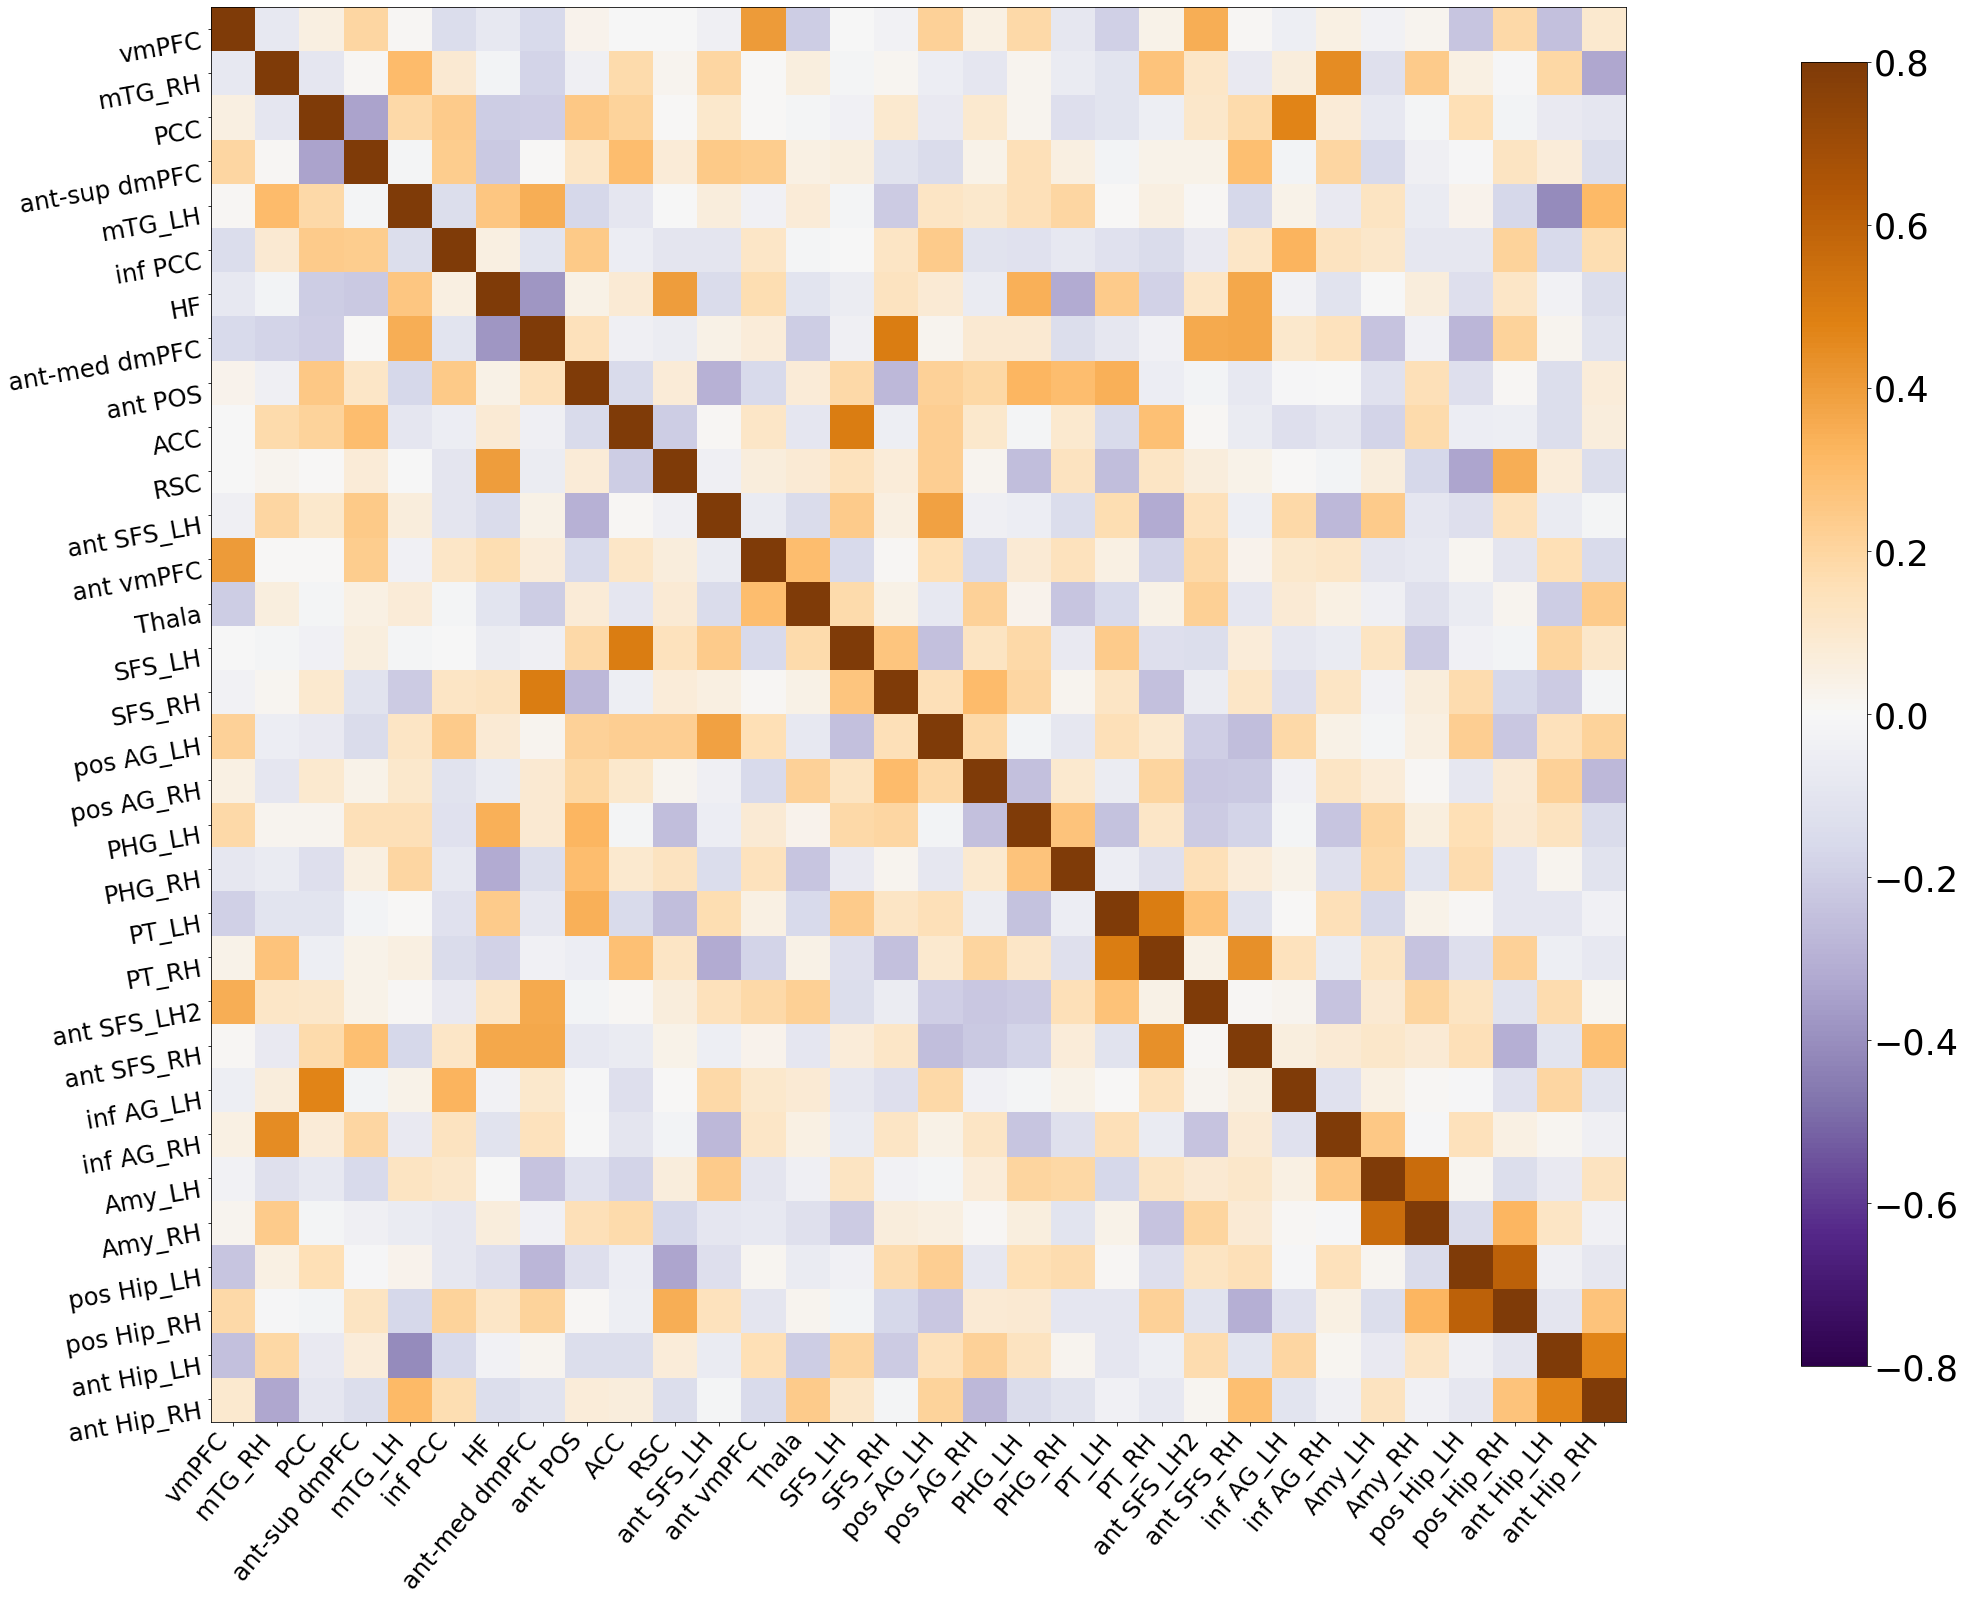

In [12]:
plt.figure(figsize=(20,25))
plt.rcParams.update({'font.size': 35})

display1 = plotting.plot_matrix(sub_correlation_matrix, 
                                figure=(30, 30), 
                                labels=labels[:], 
                                cmap = 'PuOr_r',
                                vmin = -0.8,
                                vmax = 0.8) # is in the low risk group
display1.figure.savefig('/media/sf_shared_VB/MR05_connectivity_matrix_example.png', facecolor = 'white')  